In [ ]:
pip install ucimlrepo

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/content/adult_data.csv')  #loading dataset

In [ ]:
df.head()  #1st 5 rows

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.isnull().sum()    #CHECKING FOR NULL VALUES

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [ ]:
df.tail()   #last 5 rows

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [ ]:
df.shape

(48842, 15)

In [ ]:
#dataset has 48842 rows and 15 columns.

In [ ]:
df.dtypes  #data is a mixture of numerical and categorical values.

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [ ]:
df.dropna(subset=['workclass','occupation','native-country'],inplace=True)

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
#workclass,occupation and native-country are columns with categorical
#values and so we remove null values from column dataset.
#963,966,273 null rows are very small as compared to 48000 rows
#so we remove them.

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,47621.000000,4.762100e+04,47621.000000,47621.000000,47621.000000,47621.000000
mean,38.640684,1.897271e+05,10.090821,1091.137649,87.853489,40.600050
std,13.558961,1.055695e+05,2.568320,7487.228336,404.010612,12.260345
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175840e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782820e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#we get count,mean,standard deviation,min,1st quartile,2nd quartile or median
#3rd quartile and max by df.describe().

In [ ]:
#while going through the dataset we found '?' in some rows
#of some columns which needs to be preprocessed.

In [ ]:
df['workclass'].value_counts()

Private             33717
Self-emp-not-inc     3838
Local-gov            3126
State-gov            1965
?                    1836
Self-emp-inc         1688
Federal-gov          1423
Without-pay            21
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
#? is present in 1836 rows in workclass.

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
df['occupation'].value_counts()

Prof-specialty       6110
Craft-repair         6089
Exec-managerial      6058
Adm-clerical         5589
Sales                5474
Other-service        4891
Machine-op-inspct    3006
Transport-moving     2341
Handlers-cleaners    2066
?                    1843
Farming-fishing      1485
Tech-support         1436
Protective-serv       981
Priv-house-serv       238
Armed-Forces           14
Name: occupation, dtype: int64

In [ ]:
df['native-country'].value_counts()

United-States                 42958
Mexico                          936
?                               583
Philippines                     293
Germany                         202
Puerto-Rico                     180
Canada                          177
El-Salvador                     153
India                           147
Cuba                            136
England                         123
China                           120
South                           110
Italy                           105
Jamaica                         104
Dominican-Republic              100
Japan                            92
Guatemala                        87
Vietnam                          86
Poland                           85
Columbia                         85
Haiti                            71
Portugal                         65
Taiwan                           64
Iran                             57
Greece                           49
Nicaragua                        49
Peru                        

In [ ]:
df['marital-status'].value_counts()

Married-civ-spouse       21966
Never-married            15555
Divorced                  6526
Separated                 1497
Widowed                   1443
Married-spouse-absent      600
Married-AF-spouse           34
Name: marital-status, dtype: int64

In [ ]:
df['sex'].value_counts()

Male      31937
Female    15684
Name: sex, dtype: int64

In [ ]:
df['race'].value_counts()

White                 40786
Black                  4535
Asian-Pac-Islander     1447
Amer-Indian-Eskimo      460
Other                   393
Name: race, dtype: int64

In [ ]:
df['income'].value_counts()

<=50K     24720
<=50K.    11360
>50K       7841
>50K.      3700
Name: income, dtype: int64

In [ ]:
#df['column name'] = df['column name'].replace(['old value'], 'new value')
df['income']=df['income'].replace(['<=50K.'],'<=50K')

In [ ]:
df['income']=df['income'].replace(['>50K.'],'>50K')

In [ ]:
df['income'].value_counts()

<=50K    36080
>50K     11541
Name: income, dtype: int64

In [ ]:
#we preprocessed the income column values representing (<=50K. and <=50K)
#(>50K and >50K.) as same values.

In [ ]:
#'?' was found in workclass,occupation and native country columns.

<Axes: xlabel='income', ylabel='count'>

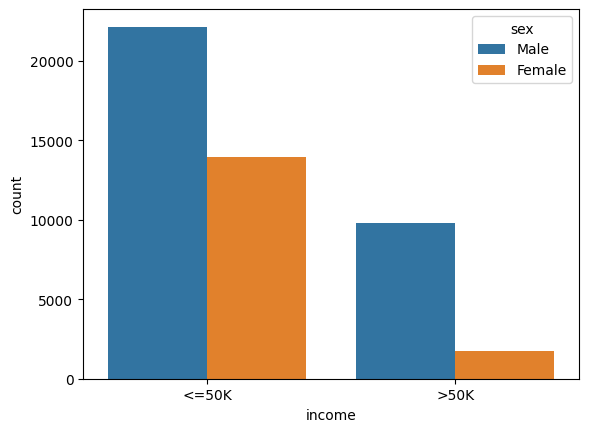

In [ ]:
sns.countplot(df,x='income',hue='sex')

In [ ]:
#countplot of income w.r.to gender
#More no of males have income more than female in the 2 categories of income.

<Axes: xlabel='income', ylabel='count'>

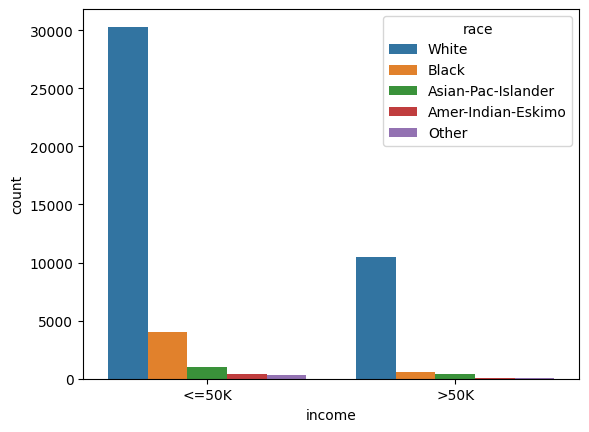

In [ ]:
sns.countplot(df,x='income',hue='race')

In [ ]:
#Count of whites are more than any other race in the 2 categories of income.

<Axes: xlabel='income', ylabel='count'>

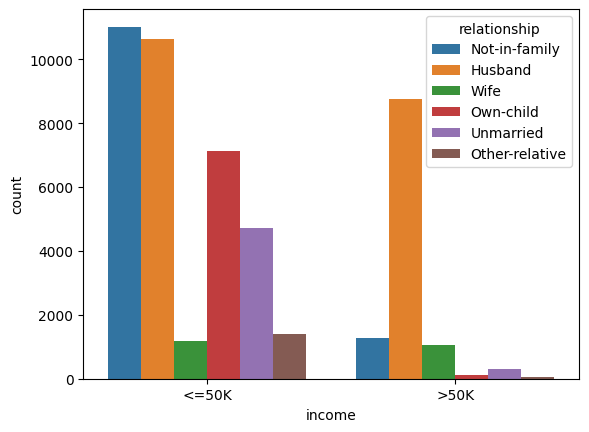

In [ ]:
sns.countplot(df,x='income',hue='relationship')

In [ ]:
#In <=50K count of peole not-in-family is the maximum.
#In >50K count of relationship husband is more.

In [ ]:
#'?' was found in workclass,occupation and native country columns.
df.mode()   #mode value for each column.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,36,Private,203488,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


In [ ]:
#since '?' is present in many rows so we replace '?' in various columns
#by mode values of respective columns.

In [ ]:
df['workclass']=df['workclass'].replace('?','Private')
df['occupation']=df['occupation'].replace('?','Prof-specialty')
df['native-country']=df['native-country'].replace('?','United-States')

In [ ]:
df['workclass'].value_counts()  #checking

Private             35553
Self-emp-not-inc     3838
Local-gov            3126
State-gov            1965
Self-emp-inc         1688
Federal-gov          1423
Without-pay            21
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


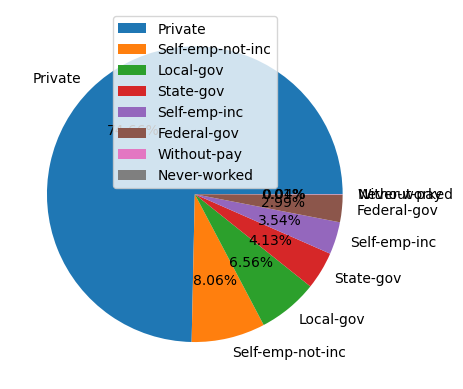

In [ ]:
#using pie chart
gender = df['workclass'].value_counts()
#  Plot the pie chart
labels=["Private","Self-emp-not-inc","Local-gov","State-gov","Self-emp-inc","Federal-gov","Without-pay","Never-worked"]
plt.pie(gender, labels=labels, autopct='%1.2f%%')
#plt.axis('equal')
plt.legend()
plt.show()

In [ ]:
#more than 70% of population works in private sector.

In [ ]:
df['education'].value_counts()

HS-grad         15444
Some-college    10512
Bachelors        7881
Masters          2610
Assoc-voc        2034
11th             1746
Assoc-acdm       1566
10th             1336
7th-8th           912
Prof-school       819
9th               735
12th              633
Doctorate         582
5th-6th           494
1st-4th           239
Preschool          78
Name: education, dtype: int64

In [ ]:
#we have many columns which can be grouped into one column together(Feature Engineering).
df.education= df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'School')
df.education= df.education.replace('HS-grad', 'High school')
df.education= df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'Higher')
df.education= df.education.replace('Bachelors', 'Undergraduate')
df.education= df.education.replace('Masters', 'Graduate')
df.education= df.education.replace('Doctorate', 'Doc')

In [ ]:
df['education'].value_counts()

High school      15444
Higher           14931
Undergraduate     7881
School            6173
Graduate          2610
Doc                582
Name: education, dtype: int64

In [ ]:
#in marital-status also we can group many columns into one(Feature Engineering).
df['marital-status'].value_counts()

Married-civ-spouse       21966
Never-married            15555
Divorced                  6526
Separated                 1497
Widowed                   1443
Married-spouse-absent      600
Married-AF-spouse           34
Name: marital-status, dtype: int64

In [ ]:
df['marital-status']= df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married')
df['marital-status']= df['marital-status'].replace(['Never-married'], 'Unmarried')
df['marital-status']= df['marital-status'].replace(['Divorced', 'Separated','Widowed','Married-spouse-absent'], 'Other')

In [ ]:
df['marital-status'].value_counts()

Married      22000
Unmarried    15555
Other        10066
Name: marital-status, dtype: int64

In [ ]:
#The 2 categories of income
df['income'].value_counts()

<=50K    36080
>50K     11541
Name: income, dtype: int64

In [ ]:
#converting into 0 and 1 so that binary classification can be done.
df.income = df.income.replace('<=50K', 0)
df.income = df.income.replace('>50K', 1)

In [ ]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Undergraduate,13,Unmarried,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Undergraduate,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,High school,9,Other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Undergraduate,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Graduate,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,School,5,Other,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,High school,9,Married,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Graduate,14,Unmarried,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Undergraduate,13,Married,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [ ]:
#Correlation
df.corr()

<ipython-input-201-7e6697e05da5>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.075937,0.033327,0.078006,0.057772,0.079306,0.231986
fnlwgt,-0.075937,1.000000,-0.040933,-0.003890,-0.004949,-0.016144,-0.007687
education-num,0.033327,-0.040933,1.000000,0.125569,0.081799,0.143727,0.332845
capital-gain,0.078006,-0.003890,0.125569,1.000000,-0.031691,0.082279,0.222509
capital-loss,0.057772,-0.004949,0.081799,-0.031691,1.000000,0.055360,0.149078
hours-per-week,0.079306,-0.016144,0.143727,0.082279,0.055360,1.000000,0.227527
income,0.231986,-0.007687,0.332845,0.222509,0.149078,0.227527,1.000000


<ipython-input-202-8df7bcac526d>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

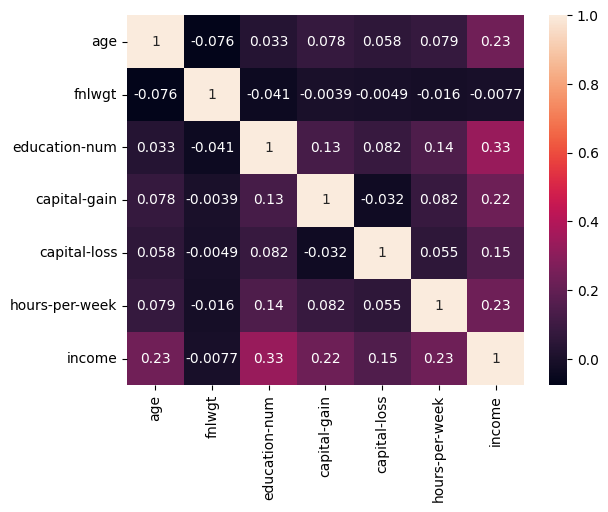

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
#The heatmap shows correlation among various columns of the dataset.

In [ ]:
#From heatmap we find all the variables are weakly correlated
#to each other as correlation coefficients or values are < 0.5 or negative
#in most of the cases.

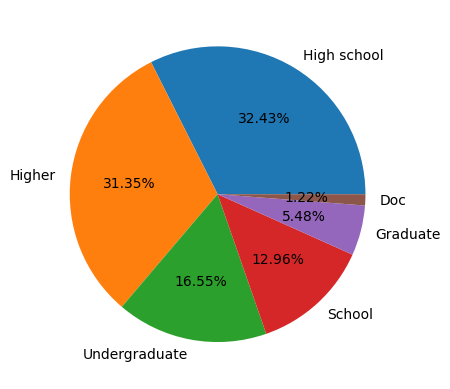

In [ ]:
#using pie chart
education = df['education'].value_counts()
#  Plot the pie chart
labels=["High school","Higher","Undergraduate","School","Graduate","Doc"]
plt.pie(education, labels=labels, autopct='%1.2f%%')
#plt.axis('equal')
plt.show()

In [ ]:
#pie-chart shows distribution of education status of population.

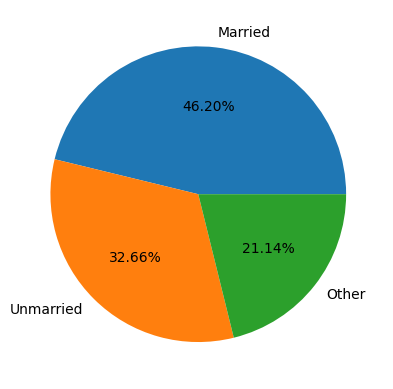

In [ ]:
#using pie chart
marital = df['marital-status'].value_counts()
#  Plot the pie chart
labels=["Married","Unmarried","Other"]
plt.pie(marital, labels=labels, autopct='%1.2f%%')
#plt.axis('equal')
plt.show()

In [ ]:
#pie-chart shows distribution of marital status of population.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>,
        <Axes: title={'center': 'income'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

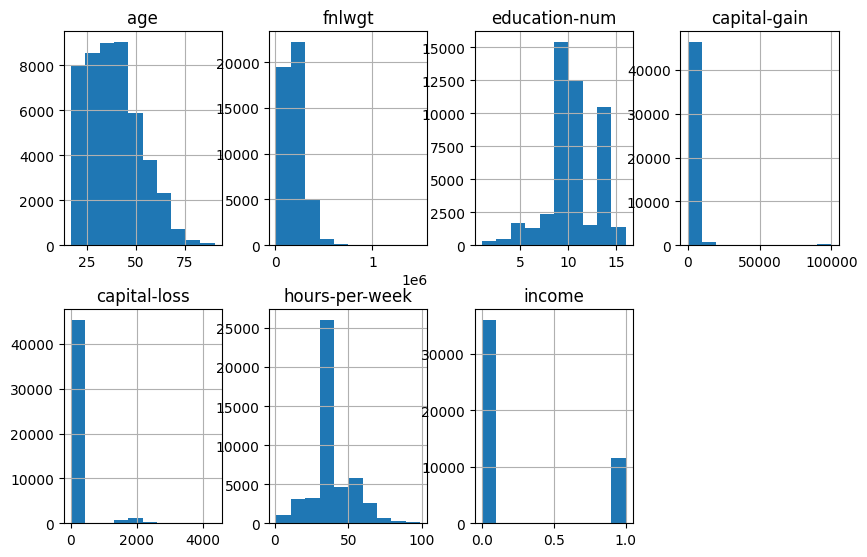

In [ ]:
#histogram showing count in different columns.
df.hist(figsize=(10,10),layout=(3,4),sharex=False)
#all histograms to be arranged in 3 rows and 4 columns.

In [ ]:
#most of the age-group lies in the age-group of 30 to 45.
#maximum people work between 25 to 50 hours per week and few people work
#for 75 hrs per week.
#for income 0 represents <=50K and 1 represents >50K
#so most people have income <=50K as is seen from histogram.

age                  Axes(0.125,0.653529;0.227941x0.226471)
fnlwgt            Axes(0.398529,0.653529;0.227941x0.226471)
education-num     Axes(0.672059,0.653529;0.227941x0.226471)
capital-gain         Axes(0.125,0.381765;0.227941x0.226471)
capital-loss      Axes(0.398529,0.381765;0.227941x0.226471)
hours-per-week    Axes(0.672059,0.381765;0.227941x0.226471)
income                   Axes(0.125,0.11;0.227941x0.226471)
dtype: object

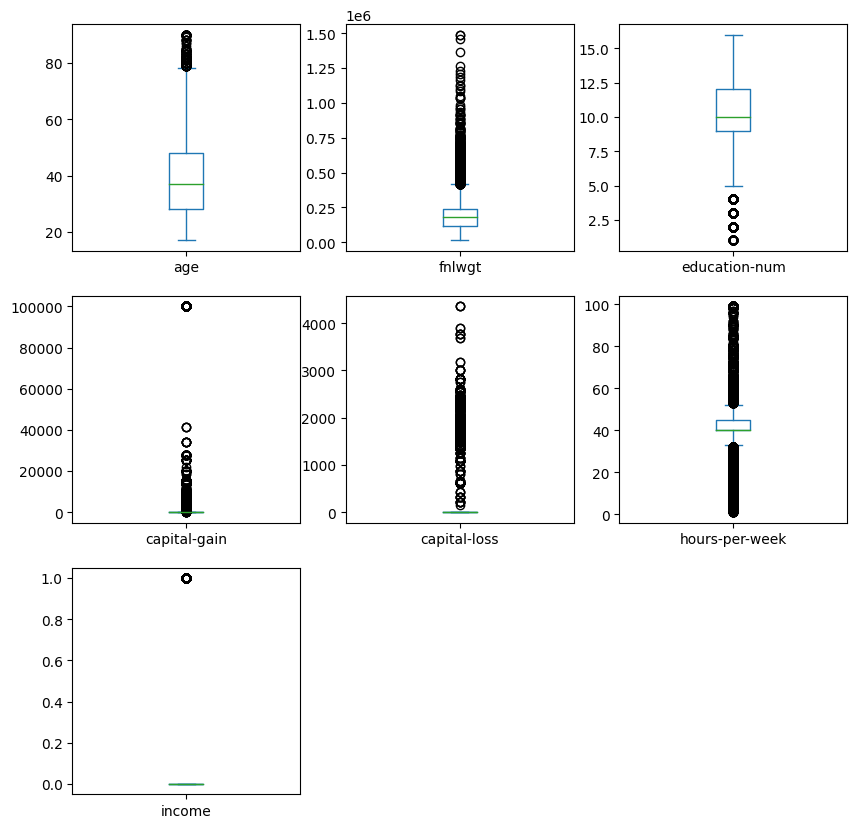

In [ ]:
df.plot(kind='box',figsize=(10,10),layout=(3,3),sharex=False,subplots=True)

In [ ]:
#The boxplots are the best tool to represent outliers.
#The dots outside the boxplots represent the outliers.
#age has outliers as some people are aged more than 80 years.
#income has outliers as some people have income >50K.
#For hours-per-week most people work 40 hours per week
#some work more and some less as is clear from outliers above and below.

In [ ]:
import plotly.express as px

In [ ]:
px.pie(df,values='education-num',names='education',title='% of education')

In [ ]:
#Based on education-num column higher,high-school,ungergraduate
#have the highest shares.

In [ ]:
#separating target column i.e. income from other columns
x=df.drop(['income'],axis=1)
y=df['income']

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
df1=df.copy()
df1=df1.apply(LabelEncoder().fit_transform)
#Label Encoder is used to convert categorical variables into numerical form.
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,6,3377,5,12,2,0,1,4,1,27,0,39,38,0
1,33,5,3698,5,12,0,3,0,4,1,0,0,12,38,0
2,21,3,17968,2,8,1,5,1,4,1,0,0,39,38,0
3,36,3,19585,4,6,0,5,0,2,1,0,0,39,38,0
4,11,3,24894,5,12,0,9,5,2,0,0,0,39,4,0


In [ ]:
#we see all categorical variables converted into numerical forms.

In [ ]:
ss= StandardScaler().fit(df1.drop('income', axis=1))
X= ss.transform(df1.drop('income', axis=1))
y= df['income']
#StandardScaler removes the mean and scales each feature/variable to unit variance.

In [ ]:
#In StandardScaler 1st we fit then we transform the data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#70% of the dataset given for training and 30% will be used for testing.

In [ ]:
#The target income column has 2 classes or values i.e. 0 or 1 based on
#income <=50K or income > 50K.
#This is the case of binary classification.
#So,Logistic Regression can be applied here.

In [ ]:
#Classification is about predicting a class or discrete values.
#Evaluation metric for classification: Accuracy score
#Regression is about predicting a quantity or continuous values.
#Evaluation metric for regression: Mean Absolute Error
#accuracy score=(no. of correct prediction/total no. of input data points)*100%
#mean squared error is the average squared difference between estimated and actual value.
#Both can be used directly from sklearn.metrics

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
lr=LogisticRegression()

In [ ]:
model=lr.fit(X_train,y_train) #training

In [ ]:
prediction=model.predict(X_test)

In [ ]:
print("Accuracy of training data: {:,.5f}".format(lr.score(X_train,y_train)))
print("Accuracy of test data: {:,.5f}".format(lr.score(X_test,y_test)))

Accuracy of training data: 0.83845
Accuracy of test data: 0.84104


In [ ]:
#Both have nearly the same accuracy score for logistic regression.

In [ ]:
#df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index=False)

In [ ]:
df1.to_csv(r'/content/df1data.csv',index=False)

In [ ]:
input=(35,5,17376,2,8,0,3,0,4,1,0,0,44,38)#ONLY FEATURES OR INPUT VARIABLES HERE
#NO TARGET VARIABLE PRESENT ABOVE.
input_as_numpy_array=np.asarray(input)
#reshaping the numpy array as we are predicting for only one instance.
input_reshaped=input_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_reshaped)
print(prediction)
if(prediction[0]==0):
  print('<=50K')
else:
  print('>50K')

[1]
>50K


In [ ]:
#Above we made a predictive system using logistic regression
#taking input as all columns other than income and output as
#0 or 1 for income.
#It has 84% accuracy.
#Above it predicts correct output of 1.
#35,5,17376,2,8,0,3,0,4,1,0,0,44,38,1

In [ ]:
#Ensemble learning is a supervised learning technique used in ML to improve
#overall performance by combining the predictions from multiple models.
#Random Forest is an ensemble learning method where multiple decision trees
#are constructed and then they are merged to get more accurate predictions.
#merging for regression is the average of all predictions of different decision
#trees in the random forest.
#merging for classification is the majority of the prediction made by different decision
#trees in the random forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier()
model=rfc.fit(X_train,y_train)
prediction1=model.predict(X_test)

In [ ]:
print("Accuracy of training data: {:,.5f}".format(rfc.score(X_train,y_train)))
print("Accuracy of test data: {:,.5f}".format(rfc.score(X_test,y_test)))

Accuracy of training data: 0.99991
Accuracy of test data: 0.85623


In [ ]:
#By random forest classifier we get 85.9% accuracy which is better than
#logistic regression.

In [ ]:
#Confusion matrix is a table with 2 rows and 2 columns that reports the no.
#of true positives,true negatives,false positives and false negatives.
from sklearn.metrics import confusion_matrix

In [ ]:
#Classification report displays precision,recall,F1-score and support scores.
#precision=accuracy of positive predictions=(true positives)/(true positives + false positives)
#recall=fraction of positives that were corectly identified=(true positives)/(true positives + false negatives)
#F1 score=weighted harmonic mean of precision and recall=(2*precision*recall)/(precision+recall)
#support=no. of actual occurences of the class in the specified dataset

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(confusion_matrix(y_test, prediction1))

[[10133   753]
 [ 1301  2100]]


In [ ]:
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     10886
           1       0.74      0.62      0.67      3401

    accuracy                           0.86     14287
   macro avg       0.81      0.77      0.79     14287
weighted avg       0.85      0.86      0.85     14287



<Axes: >

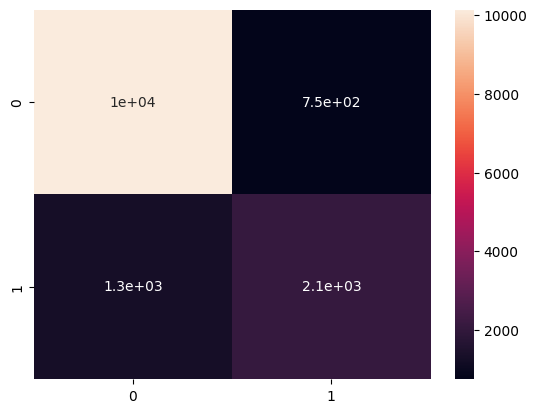

In [ ]:
cf_matrix=confusion_matrix(y_test, prediction1)
sns.heatmap(cf_matrix,annot=True)

In [ ]:
# confusion matrix is of the form
#    TP | FN
#    FP | TN

In [ ]:
print(confusion_matrix(y_test, prediction1))

[[10133   753]
 [ 1301  2100]]


In [250]:
print("Precision= ",(10133)/(10133+1301))

Precision=  0.8862165471401084


In [251]:
print("Recall= ",(10133)/(10133+753))

Recall=  0.9308285871761895


In [252]:
#above is for class 0
#now we do for class 1.

In [253]:
print("Precision= ",(2100)/(2100+753))

Precision=  0.7360672975814931


In [254]:
print("Recall= ",(2100)/(2100+1301))

Recall=  0.6174654513378418


In [255]:
print("f1 score for class 0= ",2*0.8862165471401084*0.9308285871761895/(0.9308285871761895+0.8862165471401084))

f1 score for class 0=  0.9079749103942653


In [257]:
print("f1 score for class 1= ",2*0.7360672975814931*0.6174654513378418/(0.6174654513378418+0.7360672975814931))

f1 score for class 1=  0.6715701950751519


In [258]:
#DATASET IS PICKED FROM: https://archive.ics.uci.edu/dataset/2/adult